### 如何安装jieba：https://pypi.python.org/pypi/jieba/ ###

In [75]:
import pandas as pd
import numpy as np
import os
import jieba #需要先安装jieba库

In [54]:
os.chdir('/Users/a1/Desktop/算法实战/贝叶斯_新闻分类/贝叶斯-新闻分类/data')

### 1）导入数据&处理包

In [55]:
#这里使用的是pd.read_table: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
df_news = pd.read_table('val.txt', names=['category', 'theme', 'URL', 'content'], encoding = 'utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [56]:
#df_newss = pd.read_table('val.txt')
#df_newss 

In [57]:
df_news.shape #看一下表格大概结构

(5000, 4)

### 2）使用jieba对每一条content内容分词操作，存入list

In [58]:
content = df_news.content.values.tolist() #在pandas中拿某一列的值，并把它转化为list格式
print(content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [59]:
#【进行分词操作】
content_S = []
for line in content: #对每一个content中内容循环，分词操作
    current_segment = jieba.lcut(line) #使用jieba.lcut()命令进行分词
    if len(current_segment) > 1 and current_segment != '\r\r': #挑出content中长度大于1，且不是分隔符的字符
        content_S.append(current_segment) 

In [60]:
content_S[1000] #查看分词结果

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

### 3）把分词后content的list，创建对应的dataframe

In [61]:
df_content = pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


### 4) 开始清洗：先去除停用词

In [62]:
#os.chdir('/Users/a1/Desktop/算法实战/贝叶斯_新闻分类/贝叶斯-新闻分类/')

In [63]:
# 取出停用词表
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [64]:
type(stopwords)
type(df_content)

pandas.core.frame.DataFrame

In [65]:
#定义一个函数，输入：list格式的文档与停用词表， 输出：去除停用词的文档，与去除的文档词
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

### 5) 清洗完成第一步，去除了contents中在停词表出现过的词汇

In [67]:
df_content = pd.DataFrame({'contents_clean' : contents_clean}) #把处理完成的list，改成字典格式，传入DataFrame格式
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [68]:
df_all_words = pd.DataFrame({'all_words':all_words}) #把处理完成的所有的all_words打印出来
df_all_words

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ
5,憬
6,杭州
7,滨江区
8,江陵
9,路


### 6）计算词频，挑出出现次数最多的那几个词

In [69]:
#计算词频groupby: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
import numpy
words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count = words_count.reset_index().sort_values(by=["count"], ascending = False)
words_count.head()

/Users/a1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


### 7) 使用词云wordcloud展示

In [70]:
#使用词云
from wordcloud import WordCloud #导入安装的词云库
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib


In [73]:
#https://matplotlib.org/users/customizing.html
matplotlib.rcParams['figure.figsize'] = [10.0, 8.0]

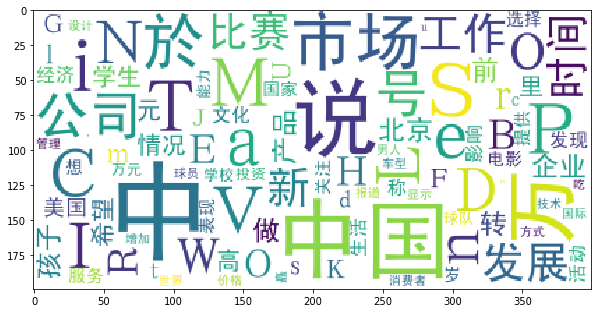

In [74]:
wordcloud = WordCloud(font_path='simhei.ttf', background_color = "white", max_font_size = 80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}  #前100个词，画出来
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)